Decision Trees - Iris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
unq = df['target'].unique()
unq

array([0, 1, 2])

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = df
x = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
le = LabelEncoder()
for col in x:
    en[col] = le.fit_transform(en[col])

In [ ]:
en.dtypes

sepal length (cm)    int64
sepal width (cm)     int64
petal length (cm)    int64
petal width (cm)     int64
target               int64
dtype: object

In [ ]:
X = en.drop('target', axis=1)
y = en['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
data_unpruned =DecisionTreeRegressor(max_depth=None, random_state=42)
data_model = data_unpruned.fit(X_train, y_train)
print("Performance without pruning:", data_model.score(X_test, y_test))
print("At depth:", data_model.tree_.max_depth)

Performance without pruning: 1.0
At depth: 6


In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file ='tree.dot',feature_names =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

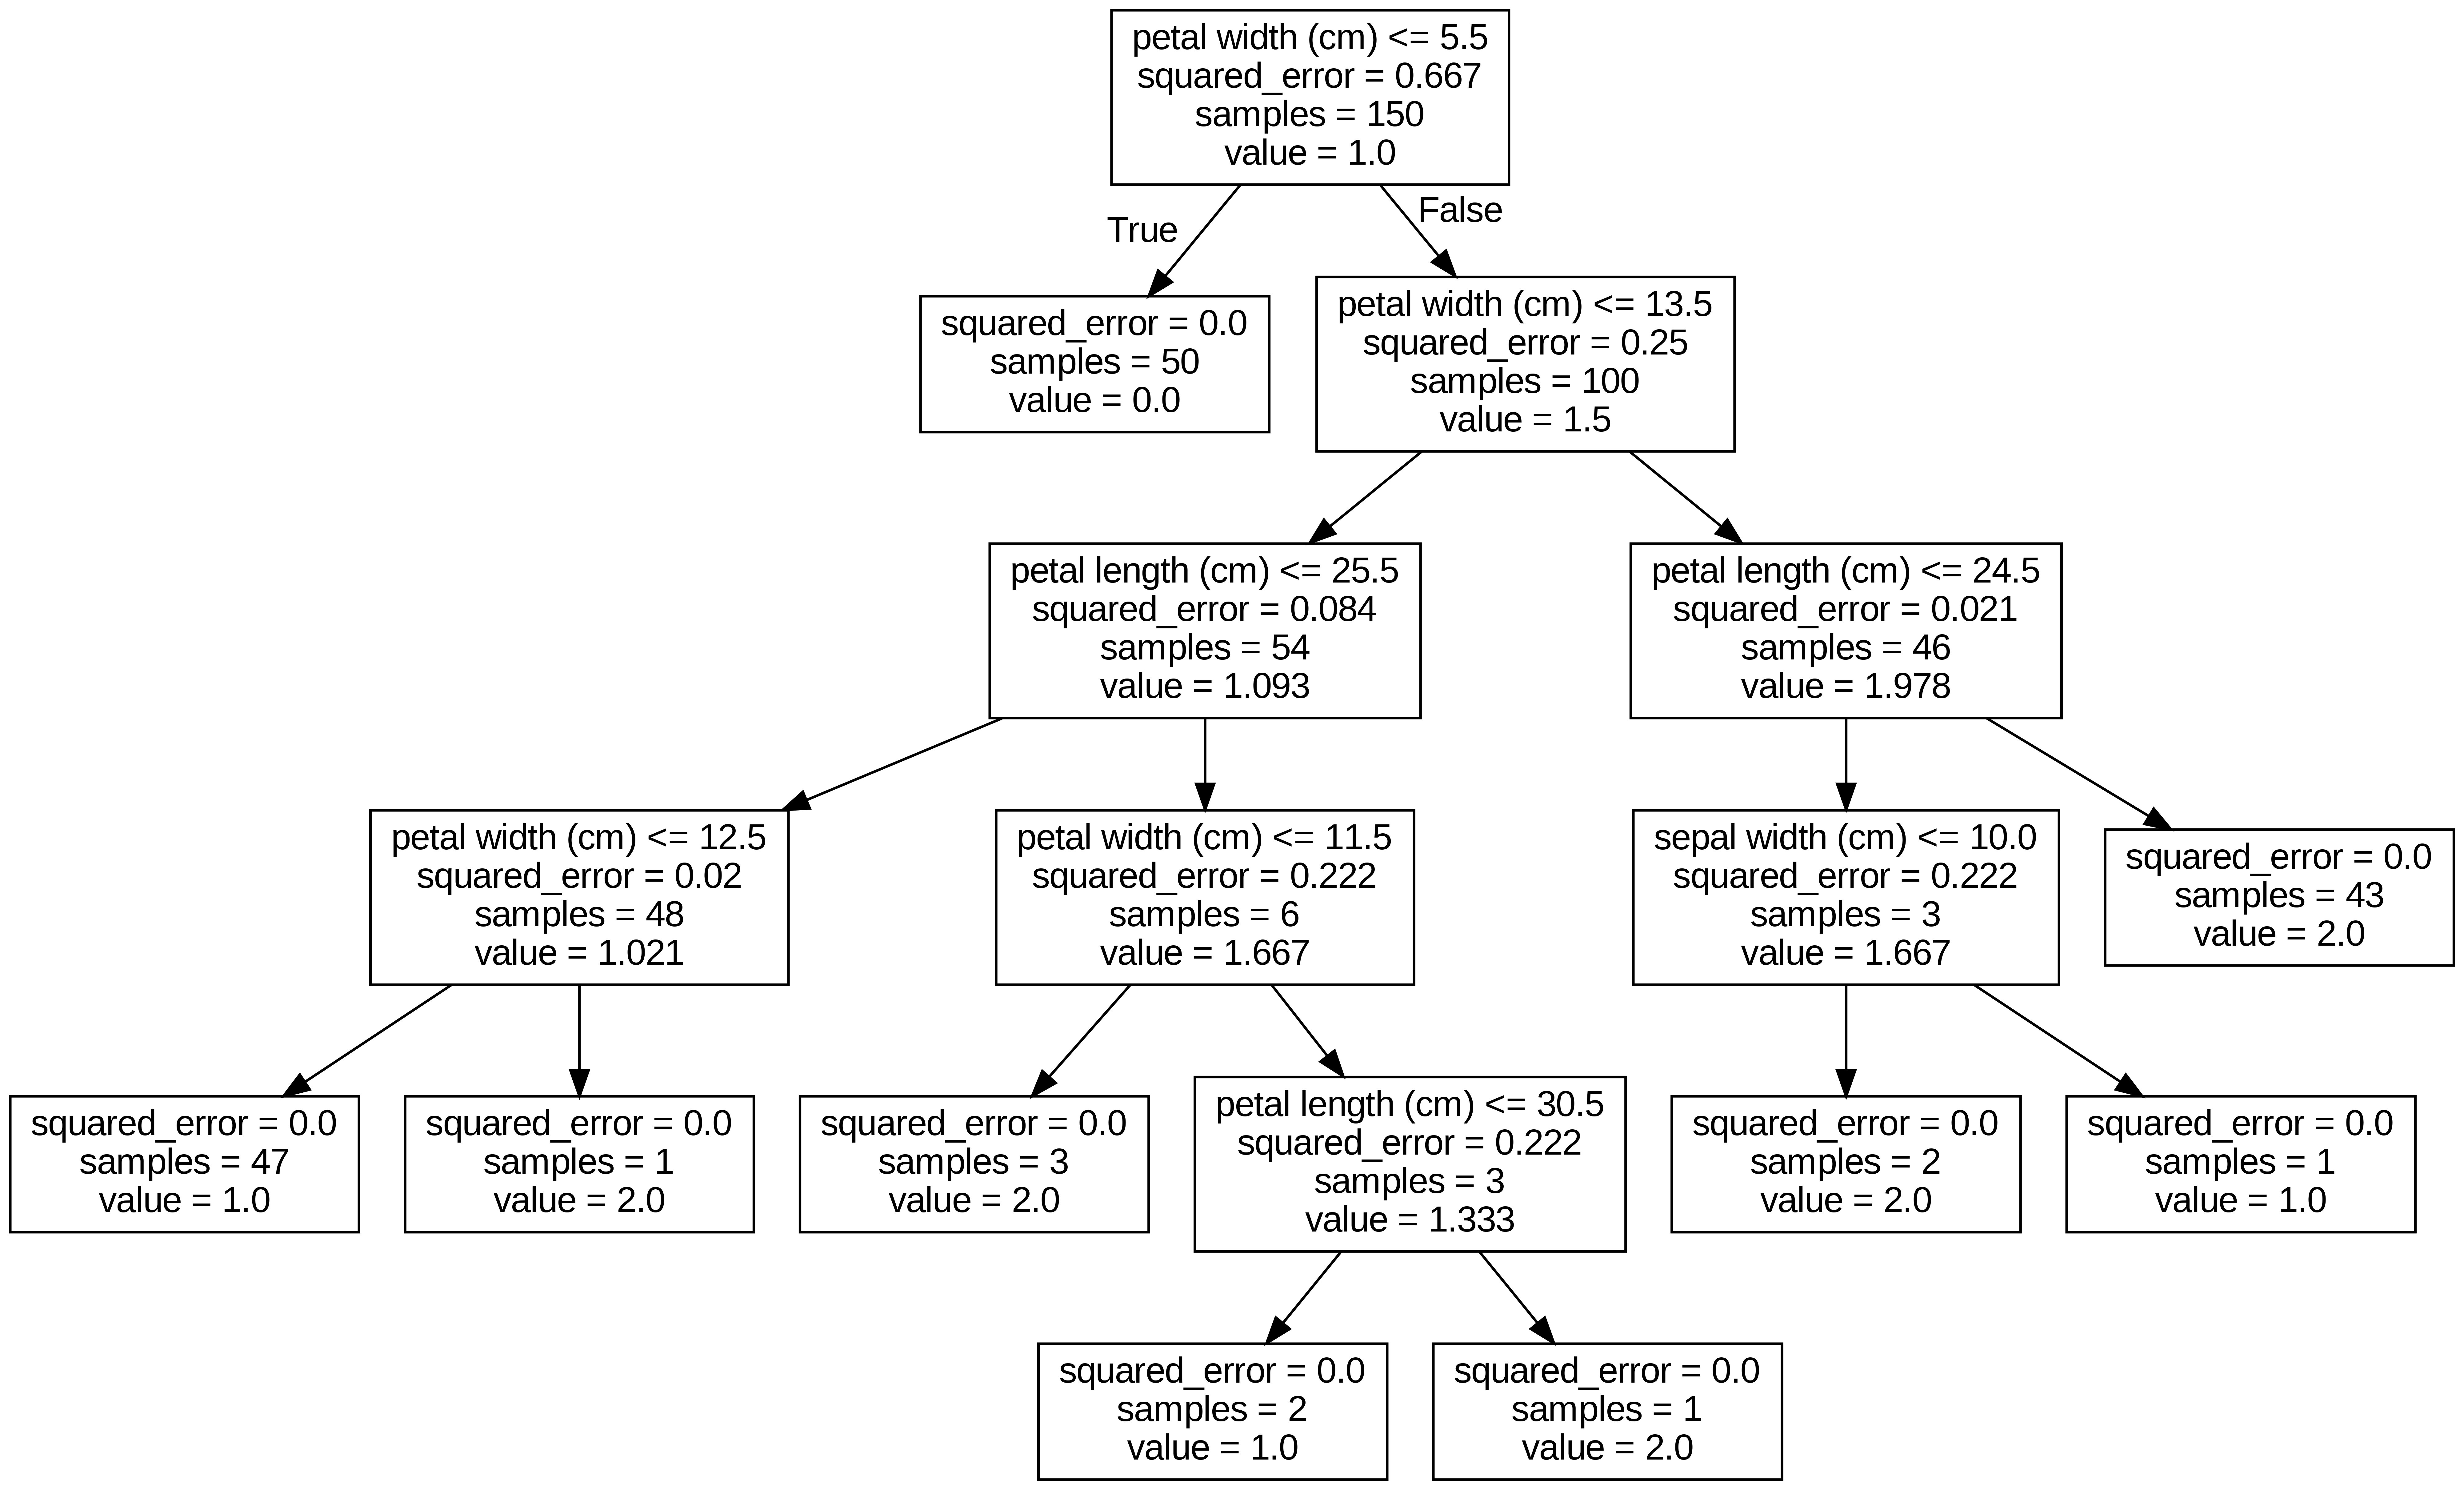

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')